# BUTTERFLY CLASSIFIER

## _IMPORTS_

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Rescaling, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

tf.test.gpu_device_name()

''

(224, 224, 3)


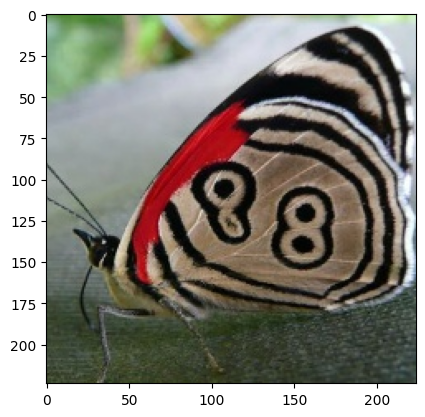

In [2]:
pil_im = Image.open('./data/training/AN 88/1.jpg', 'r')
print(np.asarray(pil_im).shape)
plt.imshow(np.asarray(pil_im))
plt.show()

## _DATA SOURCE_

In [3]:
image_size = (224, 224)
batch_size = 15

train_dataset = keras.preprocessing.image_dataset_from_directory(
    directory="./data/training",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

valid_dataset = keras.preprocessing.image_dataset_from_directory(
    directory="./data/validation",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_dataset = train_dataset.prefetch(buffer_size=32)
valid_dataset = valid_dataset.prefetch(buffer_size=32)

test_dataset = keras.preprocessing.image_dataset_from_directory(
    directory="./data/test",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 420 files belonging to 6 classes.
Found 120 files belonging to 6 classes.
Found 60 files belonging to 6 classes.


## _NEURAL NETWORK MODEL_

In [4]:
model = keras.Sequential()

model.add(Rescaling(
    scale=1./127.5,
    offset=-1,
    input_shape=(224,224,3)
))

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

## _TRAINING_

In [5]:

epochs = 100

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_dataset,
        epochs=epochs, 
        validation_data=valid_dataset,
        callbacks = [es]
)

Epoch 1/100
28/28 [==============================] - 21s 562ms/step - loss: 1.7440 - accuracy: 0.2714 - val_loss: 1.4790 - val_accuracy: 0.4000
Epoch 2/100
28/28 [==============================] - 20s 700ms/step - loss: 1.2460 - accuracy: 0.4976 - val_loss: 1.2207 - val_accuracy: 0.4917
Epoch 3/100
28/28 [==============================] - 17s 616ms/step - loss: 0.8936 - accuracy: 0.6357 - val_loss: 0.8310 - val_accuracy: 0.6750
Epoch 4/100
28/28 [==============================] - 17s 588ms/step - loss: 0.6499 - accuracy: 0.7429 - val_loss: 0.6988 - val_accuracy: 0.7750
Epoch 5/100
28/28 [==============================] - 15s 535ms/step - loss: 0.6886 - accuracy: 0.7452 - val_loss: 0.7798 - val_accuracy: 0.7500
Epoch 6/100
28/28 [==============================] - 16s 545ms/step - loss: 0.4524 - accuracy: 0.8357 - val_loss: 0.5561 - val_accuracy: 0.7750
Epoch 7/100
28/28 [==============================] - 16s 550ms/step - loss: 0.4031 - accuracy: 0.8429 - val_loss: 0.5883 - val_accuracy:

#### EVALUATION

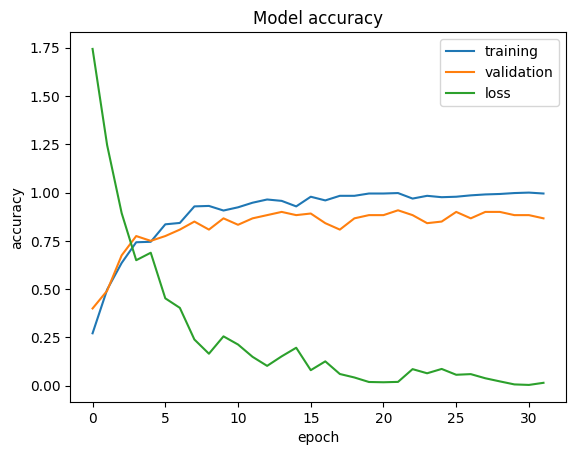

In [6]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show()

## _VALIDATION_

#### CONFUSSION MATRIX

1/1 [==============================] - 0s 205ms/step
              precision    recall  f1-score   support

           0     1.0000    0.8333    0.9091        24
           1     0.9000    0.9474    0.9231        19
           2     0.8500    0.9444    0.8947        18
           3     0.9500    1.0000    0.9744        19
           4     0.9000    0.9000    0.9000        20
           5     0.8500    0.8500    0.8500        20

    accuracy                         0.9083       120
   macro avg     0.9083    0.9125    0.9085       120
weighted avg     0.9121    0.9083    0.9081       120



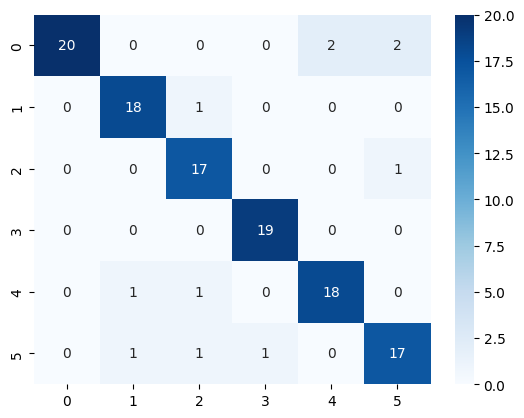

In [7]:
results = np.concatenate([(y, model.predict(x=x)) for x, y in valid_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

## _TEST_

#### CONFUSSION MATRIX

1/1 [==============================] - 0s 202ms/step
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.8000    0.8889    0.8421         9
           2     0.9000    1.0000    0.9474         9
           3     1.0000    1.0000    1.0000        10
           4     0.9000    0.9000    0.9000        10
           5     1.0000    0.8333    0.9091        12

    accuracy                         0.9333        60
   macro avg     0.9333    0.9370    0.9331        60
weighted avg     0.9383    0.9333    0.9336        60



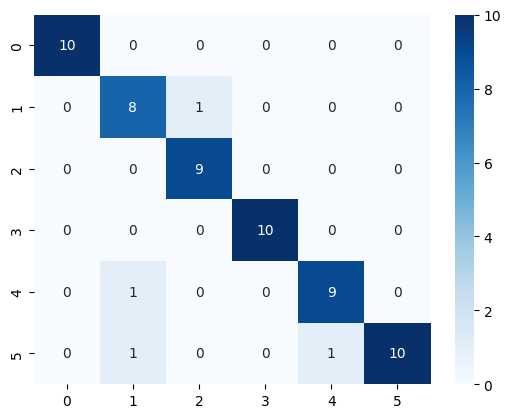

In [8]:
results = np.concatenate([(y, model.predict(x=x)) for x, y in test_dataset], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))